#**INTRODUCTION TO MACHINE LEARNING WITH PYTHON**
I'm just amazed about the hundreds of thousands of kinds of lottery games there are worldwide. A whole economic universe based on *randomness* and *luck*.
 
But, is it *just* randomness and luck what separates the few winners from the vast ammount of losers? Can lottery winners be *made*? Can we become one of them?
###**No.**
 
####**We can, however, make  accurate predictions on sports, and learn about Machine Learning and some other stuff while we demonstrate both statements.**
  
Welcome you to a fast overview on [***Machine Learning***](https://en.wikipedia.org/wiki/Machine_learning), with a rather simple project anyone with a basic understanding of Python will understand and expand into, so this is in essence an **Introduction to Machine Learning with Python**.
 
That said, there are a very few things you should be comfortable with in order to make the best out of this excersice:
1. A basic understanding of [Pandas](https://pandas.pydata.org/) is advisable.
2. Be familiarized with some of the modules from the [standard Python library](https://docs.python.org/3/library/) such as *time* and *random*.
 
###Yet, **don't be afraid if you are new to Python -or don't have any Python knowledge whatsoever- because I'll be explaining step by step everything we are about to do**.
 
So, let's jump right into proving we can't beat the lottery but could make fairly accurate sports predictions.
 
####***Dan***.

#**Part I: What we cannot do**
 
More often than not, **we get a better understanding of the things we can actually accomplish by understaning the things we can not**. That is the reason why I included the lottery predictions will-miserably-fail attempt into this excercise. Besides, it will allow me to get into some interesting *Python* and programming subjects that hopefully may be useful to you sometime.

##**Step One:**
 
###**Defining the problem.**
 
As I said before, there are literally hundreds of thousands of lottery games worldwide, so the first thing we need to define is what sort of game we are addressing with our excercise.
 
We have to rule out any sort of lottery game where we don't have any possible way to define winning numbers, so say goodbye to scratchers and any other game where the numbers has been previously selected for us.
 
Thus, we are aiming only to those sort of games in which we have an actual input other than just paying. For our excercise we are going to work with the classic *Lotto*, defined by the Oxford Dictionary as follows:
>A game of chance in which each player tries to match the numbers on their card with numbers pulled out of a container.
 
**Traditionally, the *lotto* game consists on choosing six numbers from 1 to 49. That's the one we are going to work with**.

##**Step Two:**
 
###**Defining the parameters.**
 
Once we have picked the game we are trying to beat, let's outline its basic rules and principles:
1. The game offers a list of numbers from 1 to 49, from which the player chooses 6.
2. No number is repeated, since each one appears only once in the set.
3. The order on which the winning numbers are picked at the moment of the lottery match is irrelevant.
 
Simple enough, but the chances are astronomically against us: almost [1 to 14 million against](https://en.m.wikipedia.org/wiki/Lottery_mathematics#Choosing_6_from_49).

##**Step Three:** 
###**Getting the parameters into code.**
Once outlayed the parameters of the game, the next we have to do is translate those parameters into actual code.
 
So, we need a function that chooses six random numbers from 1 to 49, pretty simple. And of course repeat the process several thousands if not millions of times. Not quite as simple.
 
Even though It may be obvious, let's clarify that what we are generating the winning set, i.e. the one obtained in the lottery match, not the ones picked up from a random player. Each random set generated by the algorithm would represent a different lottery match.

###**Defining the function:**
 
For our lottery winning set creation function we'll need to import a specific tool from the random module: *sample*.
 
We use *random.sample* instead of *random.randint* because we are not simply generating the six numbers out of a given range, but picking them up from a list, thus avoiding repetition (a key parameter of the lottery game we are representing, as explained before). Not only that, *randint* operates only on integers, and we'd like our code to work with other items too, in case some specific lottery game requires it.

In [1]:
from random import sample

In [ ]:
def lottery():
    winner_set = sample(range(1, 50), 6)
    winner_set.sort()
    return winner_set
 
print(lottery())

[8, 15, 16, 17, 40, 41]


 Our function works at the very basic level: it returns a winning set of numbers for our imaginary lottery game.
 
But **we are aiming to feed a machine learning algorithm with thousands of results**, and even tho we could achieve that with a for loop, it would be better if the function gives us that posibility from scratch.
 
###**How should we address that?**
So, we what we want is our function to return a set of winning numbers, or a list of sets of winning numbers if we'd like to.
 
It would be also desireable that our function could adapt with ease to any sort of lottery game where the player made a pick -however long the pick should be- among any sort of values, however long it is and however its type (not only numerical).
 
###**How would you solve this?**
 Without reading any further, think about this for a couple of minutes. Write down your solution and if it is different than the one proposed here, please let me know. You'll find an email link at the end of this Jupyter Notebook.
 
###**Did you solve it?**:
Let's recap:
 
We want a function that returns either a winning match of *something* or a whole bunch of winning matches of said something.
 
What we need here is a set of parameters that our function will work with:
1. the list of things from where the player needs to pick his choice.
2. The lenght of the choice.
3. How many results do we want our algorithm to generate.
 
Once stablished that, we need to figure out a way for our function to take care of the third point listed before. This is by far the trickiest part of the algorithm.
 
I guess many of you thought in a solution as follows:
 
    def lottery(items_list, pick_lengh, iterations): 
        winner_set = []
        for i in range(iterations):
            winner_set.append(sample(items_list, pick_lengh))
            winner_set.sort()
        return winner_set

Maybe you added some try/excepts to verify for instance that the *pick_lengh* is no larger than the *items_list*, or the *iterations* is actually an integer. If so, that is actually great; if not, it's ok anyhow.
 
This was actually the second solution I personally tried for this particular problem. It get's the job done and it's quite easy to read. Yet, I stand with my first solution, and after we compare each other I think you will also.

###**My solution:**
Consider the solution described before: what it does is iterating over a given range calling a function -*random.sample*- with some parameters -*items_list*, *pick_lengh*-, and appending the result onto a list.
 
Yet it has to complete the iteration before it actually has anything to return. So, **it does the same thing over and over until it hits a benchmark. And no matter what, it will certainly eventually hit that benchmark**. This is the key to my approach:
 
####**Hello, [recursion](https://en.m.wikipedia.org/wiki/Recursion)!**
In the shortest possible explanation, a recursive function is one that calls itself until it reaches a predefined escape route, thus not becoming an enless loop.
 
How could we rebuild our function recursively? Well, anytime the *iterations* is greater than one, it basically runs itself over and over as if the *iterations* paramater was set to 1 (value that we define as default). **That gives us a major boost in performance**, and not only that, we can create the returning *winner_set* in the same line as we loop over the range of *iterations* thanks to *List Comprehension* making our function even more *pythonesque*.
 
Here's how our function would look like with the recursive reconfiguration described before:

In [2]:
def lottery(items_list, pick_lengh, iterations=1):
    if iterations == 1:
        winner_set = sample(items_list, pick_lengh)
        winner_set.sort()
    else:
        winner_set = [lottery(items_list=items_list, pick_lengh=pick_lengh) for i in range(iterations)]
    return winner_set

###**The test:**
 
Let's run both of our solutions and compare how long it takes for each one to generate a large ammount of results, say ten thousand winning sets (remember we need a large set to feed our machine learning algorithm, so we will be using an even larger set than this).
 
We'll start with the first solution:

In [ ]:
import time
from random import sample
 
def lottery(items_list, pick_lengh, iterations):
    winner_set = []
    for i in range(iterations):
        winner_set.append(sample(items_list, pick_lengh))
        winner_set.sort()
    return winner_set
 
start = time.time()
lottery(range(1, 50), 6, 10000)
end = time.time()
end - start

3.3007326126098633

And now with the recursive function:

In [ ]:
def lottery(items_list, pick_lengh, iterations=1):
    if iterations == 1:
        winner_set = sample(items_list, pick_lengh)
        winner_set.sort()
    else:
        winner_set = [lottery(items_list=items_list, pick_lengh=pick_lengh) for i in range(iterations)]
    return winner_set
 
start = time.time()
lottery(range(1,50), 6, 10000)
end = time.time()
end - start

0.09746456146240234

As we see, the recursive function is way faster than the non recursive one. **In less than a tenth of a second, the recursive function did the task the non recursive function took more than three seconds to achieve**. And the bigger the *iterations* parameter get, the bigger the difference in the performance will be.

A common practice on tutorials is to feed random algorithm with a seed in order to get the same results, so everyone tring the code get the same results. That, however, is not a valid option for us, because we are using a recursive function; thus, if seeded, everytime it'd call itself it would generate the exact same sample, returning a whole list with the same winning set repeated over and over again.
 
Another good practice would be to save the result as a .csv file for easy loading the data instead of continuosly generating it. That we can do, and of course that will also enable us to work with the same set of data.
 
Let's then generate a set of eight thousand results and save it as a .csv file:

In [ ]:
winners_set = lottery(range(1, 50), 6, 8000)

In [ ]:
import pandas as pd
 
df = pd.DataFrame(winners_set, columns=[0, 1, 2, 3, 4, 5])
df.to_csv('/content/drive/MyDrive/Colab Notebooks/winning_sets.csv', index=False)
df.head()

,0,1,2,3,4,5
0,7,21,29,36,37,42
1,11,28,32,35,45,46
2,21,22,23,37,40,44
3,12,14,15,21,38,49
4,3,13,25,38,45,47


 
##**Step Four:** 
###**Smashing our heads against the wall.**
Let's load our data directly from the .csv file:

In [3]:
import pandas as pd
 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winning_sets.csv')
df.head()

,0,1,2,3,4,5
0,7,21,29,36,37,42
1,11,28,32,35,45,46
2,21,22,23,37,40,44
3,12,14,15,21,38,49
4,3,13,25,38,45,47


Before we move on, let's check out some interesting stats of our dataset by creating a new dataframe that contains the data resulting of applying the *describe* method on our original dataset (the *transpose* method inverts the columns and rows axis):

In [ ]:
df_describe = pd.DataFrame(df.describe()).transpose()
df_describe = df_describe.drop('count', axis=1)
df_describe

,mean,std,min,25%,50%,75%,max
0,7.193250,5.628020,1.0,3.0,6.0,10.0,35.0
1,14.335125,7.332158,2.0,9.0,13.0,19.0,43.0
2,21.459250,8.068580,3.0,15.0,21.0,27.0,46.0
3,28.597625,8.093896,5.0,23.0,29.0,35.0,47.0
4,35.664375,7.396524,7.0,31.0,37.0,41.0,48.0
5,42.810375,5.769994,12.0,40.0,44.0,47.0,49.0


As seen above, the standard deviation on the set gets higher as it aproaches to the middle range, which shouldn't be surprising since at the edges there is less room to deviate.
 
This behaviour mimics the game of dices, where chances of rolling a 7 with a pair of dices is higher than any other number, yet the odds of rolling said 7 is still rather low.
 
Let's put this into a graphic:

In [ ]:
import plotly.express as px
 
fig = px.line(df_describe, y='std', x=range(6))
fig.show()

Another interesting aspect from the *df_describe* table is the minimum and maximum rows. Not that it would affect our chances to predict any results -that ship has already saled-, but just for fun let's find the lowest and highest set of winning numbers in our dataframe.
 
For the lowest, we'll search for the lowest result on the higher column (5), and for the highest we'll do the opposite, meaning we'll search for the highest number in the lowest column (0), using Panda's *loc* method:

In [ ]:
min = df.loc[(df['5'] == 12)]
min

,0,1,2,3,4,5
3339,3,6,8,9,11,12


In [ ]:
max = df.loc[(df['0'] == 35)]
max

,0,1,2,3,4,5
1412,35,41,42,45,46,48


From the results we got in both searches, we see the very lowest and highest sets of numbers correspond to the rows 3339 and 1412, respectively.
 
We can pinpoint those rows with the *iloc* method:

In [ ]:
min_max = df.iloc[[3339, 1412]]
min_max

,0,1,2,3,4,5
3339,3,6,8,9,11,12
1412,35,41,42,45,46,48


This illustrates that, even though it's hard to imagine anyone betting on those sets of numbers (would you?), there is still a chance a lottery match would get that outcome, and **that chance is neither higher nor lower than any other configuration**.

Another thing we could do, is search for duplicates in our set of winning numbers, with the pandas *duplicated* method. This method returns a *boolean* value for each row -or column, if specified- in our dataframe, so it would be advicesable to search only for the results that return *True*, passing the *duplicated* search as an argument of the *loc* method, in which case we'd get the first appearance of any repeated rows by default, unless we set the *keep* parameter to False in the *duplicated* method:

In [ ]:
duplicated = df.loc[df.duplicated(keep=False) == True]
duplicated

,0,1,2,3,4,5
4093,8,26,29,33,44,45
4211,8,26,29,33,44,45


Yet, anything of what we've done so far answers the question **why can't we use machine learning to predict the winning numbers?**
 
###**The answer is rather simple:**
We use Machine Learning to either clasify data or make predictions based on correlations that may appear in previous data that has been fed to our models. We train Machine Learning algorithms to do so basically for two main reasons:
1. The correlations may be hidden deep in the data, making it impossible for us to find them.
2. Computers make calculations way faster than humans.
 
So, **correlations are a must in order to get any results with machine learning**, and lottery games matches have -or should have- absolutely no correlation with each other: each match is an entity that has anything to do with the prior or the next.
 
So, **even if the matches were fixed, they should all -or at least a huge chunk- have to be fixed following a specific and unvariable set of rules**. Those rules wouldn't have to be connected from match to match, but should eventually emerge from a large enough set of data.
 
####**Can we at least prove *that*?**
Of course.
 
What we need to prove is the fact that there are no correlations in our set of winning matches.

The first thing we are going to do in that direction is preprocess the data, using *Scikit Learn preprocessing's scale* method to [scale](https://en.m.wikipedia.org/wiki/Feature_scaling) each of the rows in our dataset.

In [5]:
from sklearn import preprocessing

In [17]:
scaled_cols = [preprocessing.scale(df[col]) for col in df]
df_scaled = pd.DataFrame(scaled_cols)
df_scaled['mean'] = df_scaled.mean()
df_scaled['median'] = df_scaled.median()
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7962,7963,7964,7965,7966,7967,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999,mean,median
0,-0.034339,0.676435,2.453369,0.854128,-0.745113,0.321048,0.143354,-0.034339,-0.745113,-0.034339,-0.567420,-0.745113,1.031822,-0.212033,-0.745113,1.031822,-0.567420,3.519530,0.498741,0.498741,3.519530,1.209515,2.097982,-1.100500,-0.745113,-1.100500,1.387209,0.498741,0.143354,-0.567420,1.564902,-1.100500,-1.100500,0.854128,-1.100500,3.519530,-0.034339,-0.922807,-0.922807,1.387209,...,0.854128,-0.922807,0.321048,-0.389726,2.275676,-1.100500,0.143354,-1.100500,-1.100500,-0.567420,0.321048,-0.922807,-0.567420,-0.034339,0.498741,-0.567420,-0.389726,-0.745113,0.321048,-0.745113,-0.567420,-1.100500,-0.212033,0.498741,-0.745113,-0.389726,-0.745113,-0.567420,-0.212033,-0.567420,-0.389726,-0.034339,-0.922807,-1.100500,-1.100500,-0.745113,-1.100500,0.143354,0.460683,0.544818
1,0.909049,1.863807,1.045443,-0.045709,-0.182103,0.227079,-0.318497,0.499867,0.363473,1.045443,-0.864073,-0.864073,0.636261,1.045443,-0.454891,1.454625,-1.136861,2.682171,0.090685,-0.454891,2.954960,0.909049,1.454625,-1.409649,-1.000467,-0.591285,2.954960,-0.454891,-0.454891,0.090685,0.636261,-1.546043,-1.546043,2.000201,-0.591285,1.863807,-0.727679,-0.454891,-1.136861,1.181837,...,0.772655,-1.546043,0.090685,0.636261,1.181837,-1.546043,-0.045709,-1.409649,-1.273255,1.045443,-0.045709,-1.136861,-0.454891,-0.864073,0.772655,-1.273255,1.454625,-1.136861,0.090685,-0.045709,-0.182103,-0.864073,0.772655,0.363473,-0.727679,-0.454891,-0.454891,-0.864073,0.227079,-0.318497,1.727413,1.045443,-0.864073,0.499867,-1.682437,-1.409649,0.363473,0.090685,1.075475,1.026652
2,0.934641,1.306476,0.190969,-0.800594,0.438859,-0.180867,-0.924539,0.067023,-0.180867,0.190969,-0.676648,-1.420320,-0.056922,1.182531,-0.552703,0.934641,-1.544265,1.802258,-0.676648,-1.172430,1.926203,0.686750,1.802258,-0.304812,0.067023,-1.048484,1.926203,1.926203,-0.180867,-0.180867,1.926203,-1.296375,-1.668211,1.430422,-0.924539,1.430422,-0.180867,0.438859,-1.668211,0.686750,...,0.190969,-1.296375,-0.304812,0.438859,0.810695,-2.163992,-0.800594,-1.668211,-0.924539,0.438859,-0.800594,0.934641,-0.800594,-1.296375,0.934641,-1.544265,0.562805,0.190969,-0.056922,-0.304812,0.562805,-1.172430,0.314914,-0.304812,-1.296375,-1.048484,0.067023,-1.048484,0.067023,-0.304812,1.058586,0.934641,-1.172430,-0.304812,-2.163992,-1.048484,-0.056922,1.926203,0.920059,0.812192
3,0.914620,0.791062,1.038177,-0.938744,1.161735,0.049716,-0.568072,-0.444514,0.667505,-0.320956,-1.185860,-1.309417,-0.197399,1.038177,-0.568072,1.285293,-2.297878,1.285293,-1.432975,-1.556532,1.285293,0.173274,1.532408,-0.938744,0.296832,-1.803648,1.285293,1.161735,-0.568072,-0.938744,2.026638,-1.185860,-1.927205,1.779523,-1.062302,0.667505,-0.073841,0.296832,-2.174321,0.173274,...,0.173274,-1.680090,0.049716,0.667505,1.038177,0.420389,-0.197399,-1.185860,1.161735,-0.320956,-1.556532,0.296832,-0.691629,-0.568072,0.296832,-2.174321,0.049716,-0.568072,-0.444514,-0.197399,0.420389,-0.938744,0.791062,1.285293,-0.815187,-1.680090,0.420389,-1.062302,-0.444514,0.173274,0.667505,0.420389,-1.432975,1.903081,-1.803648,-1.556532,-0.815187,1.903081,0.076278,0.135042
4,0.180586,1.262243,0.586207,0.315793,1.262243,0.180586,0.315793,1.127036,0.856621,-0.630657,-1.982727,-1.982727,0.451000,0.991829,-0.225035,1.127036,0.856621,0.991829,-1.306692,-0.225035,0.721414,0.045379,0.856621,-0.765864,-0.225035,-2.117935,0.586207,0.586207,1.397450,-0.630657,1.397450,-1.306692,-2.658763,1.262243,-1.577106,0.991829,-0.089828,0.991829,-1.847520,1.667864,...,-0.360242,0.721414,-0.360242,1.667864,1.127036,-0.360242,-0.630657,-0.901071,0.721414,-0.901071,-2.523556,-0.495449,-1.036278,-1.036278,0.315793,-2.253142,0.586207,0.451000,-0.901071,0.180586,0.315793,-0.360242,0.180586,0.991

Next thing we'll do is plotting our scaled data to check if there is any correlation on it:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

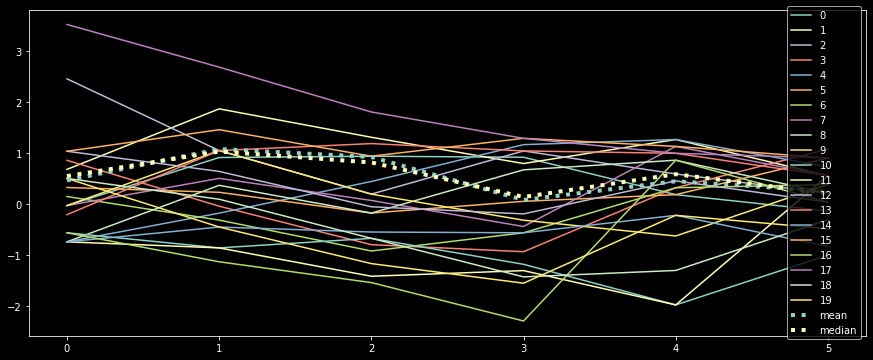

In [18]:
for row in range(20):
    plt.plot(df_scaled[row], label=str(row))
plt.plot(df_scaled['mean'], label='mean', linewidth=4, linestyle='dotted')
plt.plot(df_scaled['median'], label='median', linewidth=4, linestyle='dotted')
plt.gcf().set_size_inches(15, 6)
plt.style.use('dark_background')
plt.legend(loc='center right')
plt.show()

As we see, there is no pattern that points to a correlation in any of the represented matches -first twenty matches-, aside from the mean and median lines both of which do not represent actual matches.
 
Yet we can still, just for the sake of being stubborn, try to find correlations with a *parallel categories* graph. We'll use **Plotly** for this.
 
Let's see how that goes and hit our heads against the wall once more:

In [ ]:
fig = px.parallel_categories(df[:50], color=df['0'][:50])
fig.show()

Just to clarify:
1. The color scheme doesn't relate to correlation. It was added to better identify the numbers within our range.
2. The figure shows the first fifty one matches of our dataset.
 
What would indicate correlation is the width of the connections between the numbers, and that, as we may see, is in any case higher than 2 for any connection: for instance, the number 1 and 48 were found only twice in the subset of winning matches, and the same ocurred with the numbers 15 and 49.

For a definitive proof of non correlation, however, we could use a Machine Learning model and see how accurate it would get with our data.
 
Let's see how that goes.
 
Fortunately, we don't have to build any Machine Learning algorithm from scratch. Instead, we will use some of the models from the *Scikit Learn* library.
 
Machine Learning models are divided in two kinds: [classification and regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/). That said, the process is fairly similar to both kinds, and it can be sumarized as follows:
1. Splitting the data into two subsets, which are called *X* and *y* by convention.
2. Splitting -again- *X* and *y* into two sections: one for training and one for testing. Tipically, at least 70-80% of the data should be used for training the model while the remaining 20-30% is used for testing.
3. Train the model.
4. Test the model.
5. Messure the accuracy of the model.
6. Feed the trained model with new data (if its accuracy makes this step worthy).
 
Let's train various models with our full set of numbers alongside the ful set of winning numbers so every one gets paired with the next (i.e. the second winning set will be the outcome of the first one and so on), thus we will train our models as follows:
 
• Input: A winning set.
 
• Output: The next winning set.

First, let's import two methods that are common to all the models we are about to test: the *train_test_split* method, which will split our data into train and test subsets; and the *r2_score* method, that will take care of calculating the score. The score is represented by a float number between 0 and 1; the closer to 1, the better performance of the model predicting.
 
Let's also split our data into *X* and *y*, their subsets *X_train*, *y_train*, *X_test*, *y_test* and set the testing subset as 20% of the total data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
 
 
X = df[:7998]
 
y = df[1:7999]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Now, let's finally import and train our models and see how good they perform:

####**Linear Regression Model:**

In [10]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
score

-0.00030139225166773514

####**Ridge Model:**

In [11]:
from sklearn.linear_model import Ridge
 
model = Ridge()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
score = r2_score(y_test, predictions)
score

-0.0003013843493018438

####**Elastic Net Model:**

In [12]:
from sklearn.linear_model import ElasticNet
 
model = ElasticNet()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
score = r2_score(y_test, predictions)
score

-0.00031452698530615164

####**Decision Tree Regressor Model:**

In [13]:
from sklearn.tree import DecisionTreeRegressor
 
model = Ridge()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
score = r2_score(y_test, predictions)
score

-0.0003013843493018438

As seen above, we train four different models and all of them returned a negative score, which may sound illogical but [it is a possible outcome](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) because, as stated in the *Scikit Learn* documentation, «*the model can be arbitrarily worse*», meaning no prediction is possible.
 
###In other words, **we have definetly proven that is not possible to predict lottery winning numbers**. Bummer.

**In the next -and final- part of this work, we will ll use Machine Learning to predict something with a relatively high chance of success. We will use a lot of the things covered in this tutorial aswel as some things that we did not.**
 
Thanks for reading this.
 
 
#**About me:**
I'm a self taught programmer from Argentina. Aside other projects, I make Jupyter Notebooks based tutorials on several Python's subjects, both in English and Spanish.
 
I put a lot of time and effort on these tutorials, because they are intended to potencially helping others, and they are also a great way to refresh things I've learned and even learning new ones.
 
**You may find all of my tutorials on my [GitHub](https://github.com/dan-almenar?tab=repositories) page**.
 
##**There are several ways for you to help me keep doing this**:
 
• You may **share this tutorial** with someone you'd think it will help.
 
• You can **make a one time contribution** via [Ko-fi](https://ko-fi.com/dandev).
 
• You can **make a monthly contribution** via [Patreon](https://www.patreon.com/dandeveloper).
 
###If you want to contact me regarding this tutorial or any other subject you think I may help you with, click [here](danielalmenar@gmail.com).
 
**Thanks!**
 
###**Dan Almenar**